<a href="https://colab.research.google.com/github/shyamjith94/OpencvImagemanipulation/blob/main/2_4_2_Gemetric_trasfroms_OpenCV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%%capture
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-CV0101EN-SkillsNetwork/images%20/images_part_1/lenna.png -O lenna.png
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-CV0101EN-SkillsNetwork/images%20/images_part_1/baboon.png -O baboon.png
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-CV0101EN-SkillsNetwork/images%20/images_part_1/barbara.png -O barbara.png  

In [4]:
import matplotlib.pyplot as plt
import cv2
import numpy as np

In [5]:
image_lenna = "lenna.png"
image_baboon = 'baboon.png'
image_barbara = "barbara.png"

In [17]:
def plot_image(image_1, image_2, title_1="Orginal", title_2="New Image"):
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(image_1,cmap="gray")
    plt.title(title_1)
    plt.subplot(1, 2, 2)
    plt.imshow(image_2,cmap="gray")
    plt.title(title_2)
    plt.show()

##Geometric Trnsformation

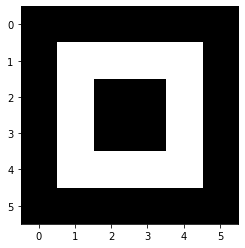

array([[  0.,   0.,   0.,   0.,   0.,   0.],
       [  0., 255., 255., 255., 255.,   0.],
       [  0., 255.,   0.,   0., 255.,   0.],
       [  0., 255.,   0.,   0., 255.,   0.],
       [  0., 255., 255., 255., 255.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.]])

In [7]:
toy_image = np.zeros((6,6))
toy_image[1:5, 1:5] = 255
toy_image[2:4, 2:4] = 0
plt.imshow(toy_image, cmap="gray")
plt.show()
toy_image

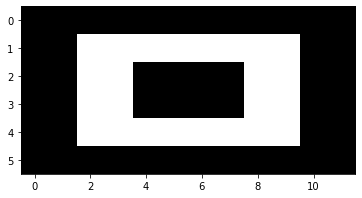

In [11]:
new_toy = cv2.resize(toy_image, None, fx=2, fy=1, interpolation=cv2.INTER_NEAREST) 
# fx scale factor horizontal
# fy scale fator vertical
plt.imshow(new_toy, cmap='gray')
plt.show()

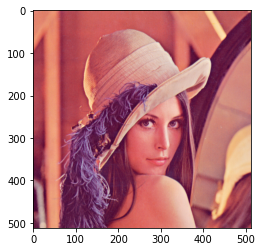

In [14]:
image = cv2.imread(image_lenna)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()

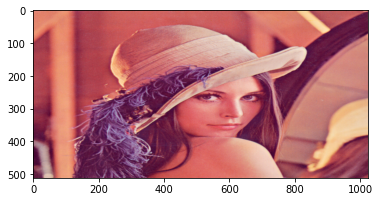

In [20]:
new_image = cv2.resize(image, None, fx=2, fy=1, interpolation=cv2.INTER_CUBIC)
plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))
plt.show()

In [21]:
print("old image shape:", image.shape, "new image shape:", new_image.shape)

old image shape: (512, 512, 3) new image shape: (512, 1024, 3)


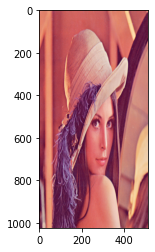

old image shape: (512, 512, 3) new image shape: (1024, 512, 3)


In [22]:
new_image = cv2.resize(image, None, fx=1, fy=2, interpolation=cv2.INTER_CUBIC)
plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))
plt.show()
print("old image shape:", image.shape, "new image shape:", new_image.shape)

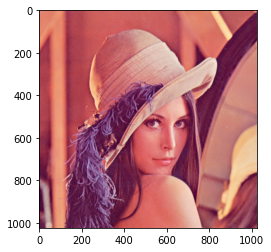

old image shape: (512, 512, 3) new image shape: (1024, 1024, 3)


In [24]:
new_image = cv2.resize(image,None, fx=2,fy=2, interpolation=cv2.INTER_CUBIC)
plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))
plt.show()
print("old image shape:", image.shape, "new image shape:", new_image.shape)

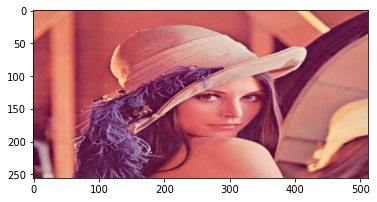

old image shape: (512, 512, 3) new image shape: (256, 512, 3)


In [25]:
new_image = cv2.resize(image, None, fx=1, fy=0.5, interpolation=cv2.INTER_CUBIC)
plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))
plt.show()
print("old image shape:", image.shape, "new image shape:", new_image.shape)

##Translation

Translation is  when you  shift the location of the image. <code>tx</code> is the number of pixels you shift the location in the horizontal direction and <code>ty</code> is the number of pixels you shift in the vertical direction.

In [27]:
tx = 100
ty = 0
M = np.float32([[1, 0, tx], [0, 1, ty]])
M

array([[  1.,   0., 100.],
       [  0.,   1.,   0.]], dtype=float32)

In [29]:
rows, cols, _ = image.shape
rows, cols, _

(512, 512, 3)

In [31]:
new_image = cv2.warpAffine(image, M, (cols,rows))

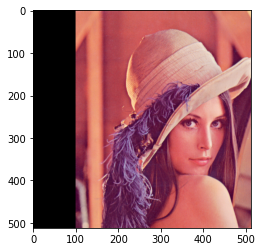

In [32]:
plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))
plt.show()

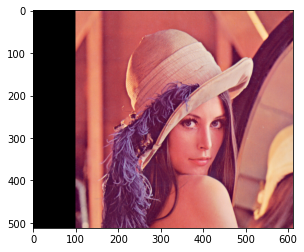

In [35]:
new_image = cv2.warpAffine(image, M, (cols + tx, rows + ty))
plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))
plt.show()

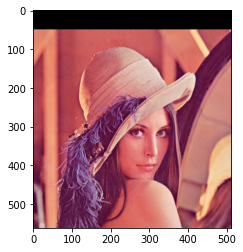

In [36]:
tx = 0
ty = 50
M = np.float32([[1, 0, tx], [0, 1, ty]])
new_iamge = cv2.warpAffine(image, M, (cols + tx, rows + ty))
plt.imshow(cv2.cvtColor(new_iamge, cv2.COLOR_BGR2RGB))
plt.show()

##Rotation

In [42]:
theta = 45.0
M = cv2.getRotationMatrix2D(center=(3,3), angle=theta, scale=1)
new_toy_image = cv2.warpAffine(toy_image, M, (6,6))

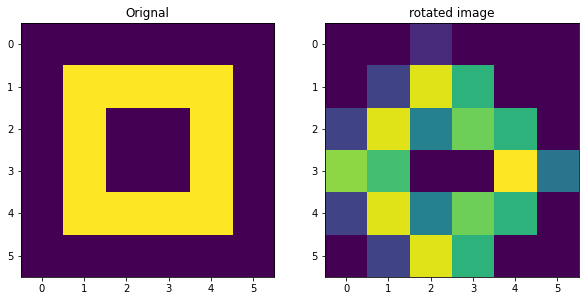

In [43]:
plot_image(toy_image, new_toy_image, title_1="Orignal", title_2="rotated image")

In [44]:
new_toy_image 

array([[  0.        ,   0.        ,  28.38867188,   0.        ,
          0.        ,   0.        ],
       [  0.        ,  47.8125    , 223.125     , 151.40625   ,
          0.        ,   0.        ],
       [ 47.8125    , 223.125     , 103.59375   , 183.28125   ,
        151.40625   ,   0.        ],
       [195.234375  , 165.10253906,   0.        ,   0.        ,
        234.82910156,  89.89746094],
       [ 47.8125    , 223.125     , 103.59375   , 183.28125   ,
        151.40625   ,   0.        ],
       [  0.        ,  47.8125    , 223.125     , 151.40625   ,
          0.        ,   0.        ]])

In [45]:
cols, rows, _ = image.shape

In [46]:
M = cv2.getRotationMatrix2D(center=(cols // 2 - 1, rows // 2 - 1), angle=theta, scale=1)
new_image = cv2.warpAffine(image, M, (cols, rows))

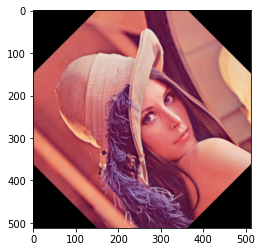

In [47]:
plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))
plt.show()

##Mathematical Operations

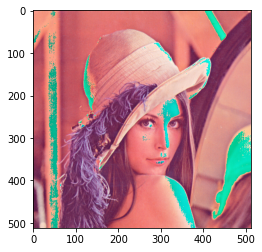

In [48]:
new_image = image + 20

plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))
plt.show()

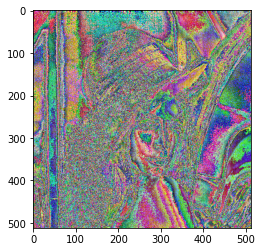

In [49]:
new_image = 10 * image
plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))
plt.show()

In [52]:
Noise = np.random.normal(0, 20, (rows, cols, 3)).astype(np.uint8)
Noise.shape

(512, 512, 3)

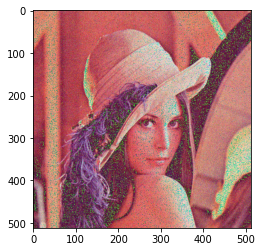

In [53]:
new_image = image + Noise

plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))
plt.show()

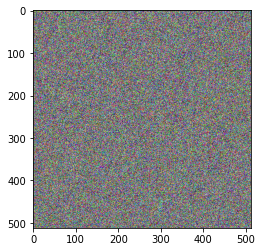

In [54]:
new_image = image*Noise

plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))
plt.show()

##Matrix Operations

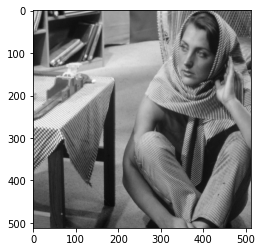

In [55]:
im_gray = cv2.imread(image_barbara, cv2.IMREAD_GRAYSCALE)
im_gray.shape

plt.imshow(im_gray,cmap='gray')
plt.show()

In [56]:
U, s, V = np.linalg.svd(im_gray , full_matrices=True)

In [57]:
s.shape

(512,)

In [58]:
S = np.zeros((im_gray.shape[0], im_gray.shape[1]))
S[:image.shape[0], :image.shape[0]] = np.diag(s)

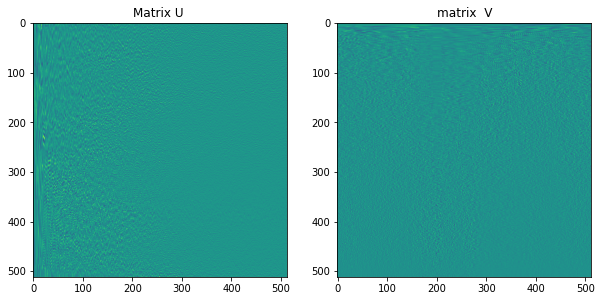

In [61]:
plot_image(U,V,title_1="Matrix U ",title_2="matrix  V")

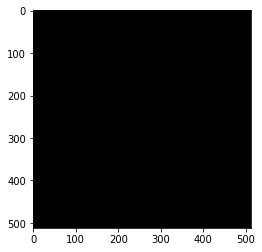

In [63]:
plt.imshow(S,cmap='gray')
plt.show()

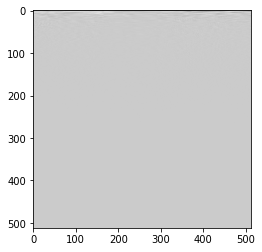

In [64]:
B = S.dot(V)
plt.imshow(B,cmap='gray')
plt.show()

In [65]:
A = U.dot(B)

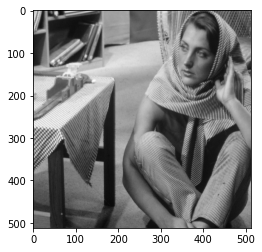

In [66]:
plt.imshow(A,cmap='gray')
plt.show()

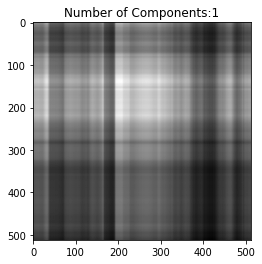

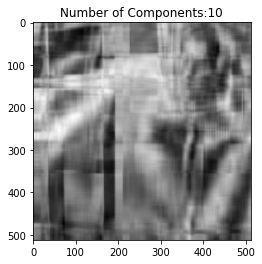

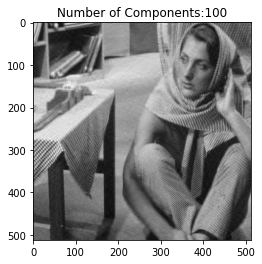

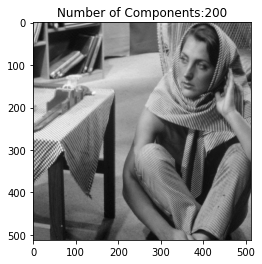

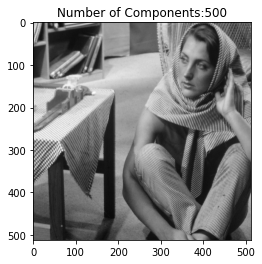

In [67]:
for n_component in [1,10,100,200, 500]:
    S_new = S[:, :n_component]
    V_new = V[:n_component, :]
    A = U.dot(S_new.dot(V_new))
    plt.imshow(A,cmap='gray')
    plt.title("Number of Components:"+str(n_component))
    plt.show()
    